In [53]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Download data from MTA

In [51]:
# Load data for the month of June
url1 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt"
url2 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt"
url3 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt"
url4 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt"
url5 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt"
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)
df5 = pd.read_csv(url5)

In [30]:
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


pseudo code
- calculate the number of people entering each station for every timestamp
    - the number of entries is cumulative (when does it reset to 0?)
- calculate the number of people exiting each station for every timestamp

In [31]:
# get rid of extra strings in columns 
df.columns = df.columns.str.replace(" ", "")

In [32]:
# Use diff() to derrive the actual number of people from the culmulative value for entries and exits for each SCP
# abs() is used to account for the turnstiles that count backwards
df['people_in'] = df.groupby(['STATION', 'UNIT', 'SCP'])['ENTRIES'].transform(lambda x: x.diff().abs())
df['people_out'] = df.groupby(['STATION', 'UNIT', 'SCP'])['EXITS'].transform(lambda x: x.diff().abs())

In [33]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,people_in,people_out
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,nan,nan
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,14.000,4.000
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,20.000,28.000
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,79.000,57.000
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,239.000,55.000


In [8]:
# show which rows are NaN - each nan is at the beginning of a new scp
df[df['people_in'].isna()].head(40)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,people_in,people_out
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,NaN,NaN
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,6298050,1412557,NaN,NaN
84,A002,R051,02-03-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,1236982,4651756,NaN,NaN
126,A002,R051,02-03-01,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,1115712,1720977,NaN,NaN
168,A002,R051,02-03-02,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,6200254,8353543,NaN,NaN
210,A002,R051,02-03-03,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,5754201,6607896,NaN,NaN
252,A002,R051,02-03-04,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7133706,3699957,NaN,NaN
294,A002,R051,02-03-05,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,11441906,1401251,NaN,NaN
336,A002,R051,02-03-06,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,8980953,499358,NaN,NaN
378,A002,R051,02-05-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,129,0,NaN,NaN


In [34]:
# Remove nan data for now
df = df.dropna()

In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,ENTRIES,EXITS,people_in,people_out
count,608858.000,608858.000,608858.000,608858.000
mean,42029680.667,34346802.190,7386.148,4115.560
std,213560476.699,196322425.330,3222978.503,2388071.971
min,0.000,0.000,0.000,0.000
25%,321277.000,128892.500,10.000,9.000
50%,2148427.000,1229616.000,73.000,53.000
75%,6772167.500,4587530.500,234.000,165.000
max,2129288981.000,2124055172.000,1819016355.000,1821589918.000


### Incorporate Jieun's analysis and select only the top 30 stations

In [36]:
# list of top 30 stations from Jieun's notebook
stations = ['23 ST', '42 ST-PORT AUTH', 'CANAL ST', '59 ST', '14 ST', '125 ST',
       '104 ST', 'TIMES SQ-42 ST', 'DEKALB AV', '86 ST', 'FRANKLIN AV',
       '145 ST', '167 ST', 'LEXINGTON AV/53', '72 ST', 'GUN HILL RD',
       'BOWLING GREEN', 'FULTON ST', 'GRD CNTRL-42 ST', '66 ST-LINCOLN',
       'KINGS HWY', 'GRAND ST', 'KINGSBRIDGE RD', '34 ST-PENN STA',
       'CHAMBERS ST', 'FORDHAM RD', '116 ST', '96 ST', '50 ST',
       'FT HAMILTON PKY']

In [37]:
# select only top 30 stations from data frame
df = df[df['STATION'].isin(stations)]

### Create a map of the top 30 stations

In [38]:
# Remove outliers
#df = df[(np.abs(stats.zscore(df["people_out"])) < 3)]

# IQR
Q1 = df["people_out"].quantile(0.25)
Q3 = df["people_out"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

207.0


In [39]:
high_outliers = Q3 + (1.5 * IQR)
high_outliers

532.5

In [41]:
df = df[df["people_out"] < high_outliers]
df.describe()

,ENTRIES,EXITS,people_in,people_out
count,132613.000,132613.000,132613.000,132613.000
mean,76225465.202,66768290.884,199.253,113.454
std,293401085.960,272995360.940,284.439,127.890
min,0.000,0.000,0.000,0.000
25%,719052.000,298398.000,14.000,12.000
50%,3773196.000,2034261.000,90.000,64.000
75%,9241847.000,6337313.000,272.000,174.000
max,2129288981.000,2062381142.000,3547.000,532.000


In [42]:
# Load table of silicon alley stations
silicon_alley = pd.read_csv('/Users/AuerPower/Metis/git/NYC_turnstile_EDA/data/silicon_alley.csv')
silicon_alley

,Unnamed: 0,line,name,notes,objectid,url,coords.x1,coords.x2
0,1,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1,http://web.mta.info/nyct/service/,-73.991,40.730
1,2,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2,http://web.mta.info/nyct/service/,-74.000,40.719
2,3,1-2,50th St,"1-all times, 2-nights",3,http://web.mta.info/nyct/service/,-73.984,40.762
3,4,J-M-Z,Delancey St - Essex St,"J-all times, M-all times exc nights, Z-rush ho...",11,http://web.mta.info/nyct/service/,-73.987,40.718
4,5,4-5-6-6 Express,Brooklyn Bridge - City Hall,"4,6-all times, 5-all times exc nights, 6 Expre...",29,http://web.mta.info/nyct/service/,-74.004,40.713
...,...,...,...,...,...,...,...,...
79,80,4-6-6 Express,Bleecker St,"4 nights, 6-all times, 6 Express-weekdays PM",457,http://web.mta.info/nyct/service/,-73.995,40.726
80,81,1-2,Franklin St,"1-all times, 2-nights",464,http://web.mta.info/nyct/service/,-74.007,40.719
81,82,7-7 Express,5th Ave - Bryant Pk,"7-all times, 7 Express-rush hours AM westbound...",466,http://web.mta.info/nyct/service/,-73.982,40.754
82,83,4-6-6 Express,Spring St,"4 nights, 6-all times, 6 Express-weekdays AM s...",467,http://web.mta.info/nyct/service/,-73.997,40.722


In [43]:
silicon_alley_str = silicon_alley.name

In [44]:
# we use this code to test whether stations in our top 30 are in sillicon alley
silicon_alley_str[silicon_alley_str.str.contains('Hamilton', regex=True)]

Series([], Name: name, dtype: object)

In [45]:
# filter top 30 based on stations that are in silicon alley
top_12_sa = ['23 ST', '42 ST-PORT AUTH', 'CANAL ST', '14 ST', 'TIMES SQ-42 ST', 'BOWLING GREEN',
             'FULTON ST', 'GRD CNTRL-42 ST', 'GRAND ST', '34 ST-PENN STA', 'CHAMBERS ST', '50 ST']
df = df[df['STATION'].isin(top_12_sa)]

In [46]:
df['STATION'].unique()

array(['TIMES SQ-42 ST', '23 ST', 'CANAL ST', 'CHAMBERS ST', 'FULTON ST',
       '50 ST', 'GRAND ST', '42 ST-PORT AUTH', '34 ST-PENN STA', '14 ST',
       'BOWLING GREEN', 'GRD CNTRL-42 ST'], dtype=object)

### Make Graphs showing frequency for time of day and day of week 
- for now it will be a random selection of stations but we will choose the stations we want to select  

In [47]:
# Create a day of week column
df['DATE'] = pd.to_datetime(df['DATE'])
df['weekday'] = df['DATE'].dt.day_name()

In [48]:
# Remove Saturday and Sunday - we want to target commuters and street teams don't want to work on the weekend
df = df[~df['weekday'].isin(['Saturday', 'Sunday'])]

In [49]:
heat_df = df.filter(['weekday','STATION','people_out'], axis=1)
heat_df.head()

,weekday,STATION,people_out
2507,Monday,TIMES SQ-42 ST,214.000
2508,Monday,TIMES SQ-42 ST,41.000
2509,Monday,TIMES SQ-42 ST,91.000
2510,Monday,TIMES SQ-42 ST,424.000
2511,Monday,TIMES SQ-42 ST,444.000


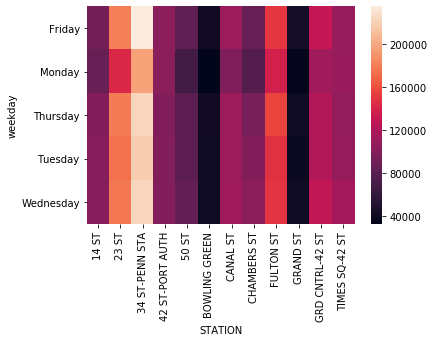

In [50]:
heat_df = heat_df.pivot_table(index='weekday', columns='STATION', values='people_out', aggfunc='sum')
sns.heatmap(heat_df)

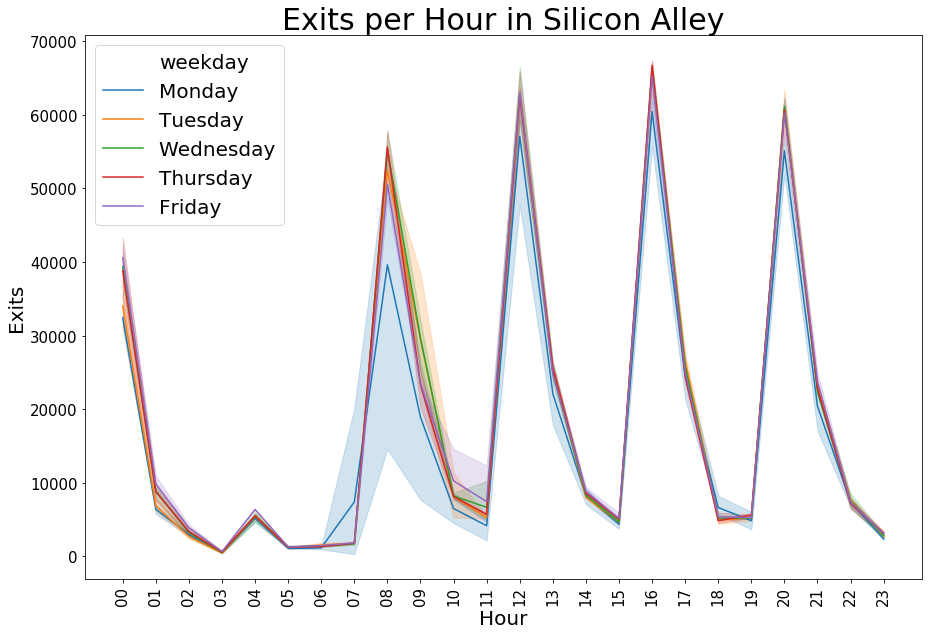

In [56]:
# Graph of time of day
df['hour'] = df['TIME'].astype(str).str[:2]
# list of our targetted stations -- the top Silicon Alley stops
top_silicon_alley_stations = ['23 ST', '42 ST-PORT AUTH', 'CANAL ST', '14 ST', 'TIMES SQ-42 ST', 'BOWLING GREEN', 'FULTON ST', 'GRD CNTRL-42 ST', 'GRAND ST', '34 ST-PENN STA', 'CHAMBERS ST', '50 ST']

# Filter down to just the targetted stations
# then filter out Saturday and Sunday
data = df[df['STATION'].isin(top_silicon_alley_stations)]
df = df[~df['weekday'].isin(['Saturday', 'Sunday'])]

# Sort for presentation's sake
data = data[['DATE', 'hour', 'weekday', 'people_out']].groupby(['DATE', 'weekday', 'hour'], as_index=False).sum()
data.sort_values(by=['hour', 'DATE', 'weekday'], inplace=True)
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=(a4_dims))
sns.lineplot(ax=ax, x='hour', y='people_out', hue='weekday', data=data)
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.title('Exits per Hour in Silicon Alley', size=30)
plt.xlabel('Hour', size=20)
plt.ylabel('Exits', size=20)
plt.legend(fontsize=20);
plt.savefig('/Users/AuerPower/Metis/git/NYC_turnstile_EDA/images/time_of_day.svg')